# WiDS Datathon 2021, Wrangling the Data
## 1. Initial Look at the DF
Summarizing the raw df:
- what is the shape of the data?
- what is the target variable? and its distribution?
- how many nulls?
- identify outliers/anomalies
- and more...

## 2. Prepping the Data for Exploration and Modeling
Taking care of questions addressed above:
- impute or remove nulls
- handle outliers
- split into train/validate/test

## 3. Add Code into Functions in a .py File

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading csv file into a pandas dataframe
df = pd.read_csv('data/TrainingWiDS2021.csv', index_col=0)

# 1. Initial Look at the Raw DF

In [3]:
# checking the shape of the data
print('There are', df.shape[1], 'columns and', df.shape[0], 'observations in the df.')

There are 180 columns and 130157 observations in the df.


In [4]:
print('Columns in the df are:')
df.columns.to_list()

Columns in the df are:


['encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp

### There are a large amount of columns in the data. Will these all be useful? Can some be removed due to poor data quality (high nulls)?

In [5]:
# creating dataframe of null count for each column
null_counts = pd.DataFrame(df.isnull().sum())

# renaming count column
null_counts.columns = ['nulls']

In [6]:
# creating column in null counts for the percentage of the column that is nulls
null_counts['percent'] = round((null_counts.nulls / df.shape[0]) * 100,2)

In [7]:
null_counts

,nulls,percent
encounter_id,0,0.00
hospital_id,0,0.00
age,4988,3.83
bmi,4490,3.45
elective_surgery,0,0.00
...,...,...
immunosuppression,0,0.00
leukemia,0,0.00
lymphoma,0,0.00
solid_tumor_with_metastasis,0,0.00


In [8]:
# checking how many column have a null percentage greater than 50
# null_counts[null_counts.percent > 25]

In [9]:
# to check specific columns during data dictionary
# null_counts[160:182]

In [10]:
# to see value counts of all numerical columns
# for x in df.columns:
    
#    if df[x].dtype == 'int' or df[x].dtype == 'float':
#        print(x)
#        print( round(df[x].value_counts()) , '-', round(df[x].max(),0) )
#        print('------------------------\n')

In [11]:
# to see range of data in numerical columns
# for x in df.columns:
    
#    if df[x].dtype == 'int' or df[x].dtype == 'float':
#        print(x)
#        print( round(df[x].min(),0) , '-', round(df[x].max(),0) )
#        print('------------------------\n')

### Data Quality
- 20 columns have no null values
- 79 columns have greater than 20% nulls
- 73 columns have more than half nulls

## Visualizing Distribution of the Target Variable
- diabetes_mellitus, if the patient has been diagnosed with diabetes
- binary value
- 1 if diagnosed with diabetes, 0 if not

Text(0.5, 1.0, 'Distribution of Diabetic Patients')

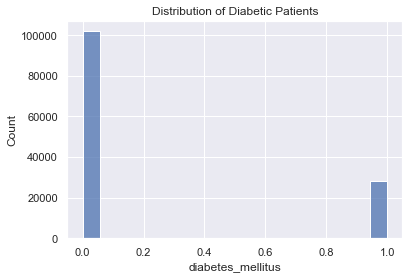

In [12]:
sns.set()

sns.histplot(df.diabetes_mellitus)
plt.title('Distribution of Diabetic Patients')

In [13]:
df.diabetes_mellitus.value_counts()

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

#### Most patients in the dataset are not diabetic
Note: the dataset will need to be balanced

# 2. Prepping the Data for Exploration and Modeling
In order of features in dataset

## When prepping
- some columns are being stored as floats when the values all end in .0, i.e. 103.0
- some features can be converted to a binary 0-1 value instead of text
- some have too high amount of nulls and need to be removed

## Using threshold with dropna
- removing columns with a very high percentage of nulls, more than 75%
- after preppring each feature, I will run the function again both on rows and columns with more than 60% nulls

In [14]:
# Removing Nulls from Columns
# sets thresh hold to 75 percent nulls, if more than %25 nulls it will be removed
threshold = df.shape[0] * .70

# remove columns with specified threshold
df = df.dropna(axis=1, thresh=threshold)

In [15]:
print('   The df now has', df.shape[1], 'columns.')

   The df now has 106 columns.


In [16]:
# Removing Nulls from Rows
# sets thresh hold to 50 percent nulls, if more than %50 nulls it will be removed
thresh_hold = df.shape[1] * .75

# remove rows with specified threshold
df = df.dropna(axis=0,thresh=thresh_hold)

In [17]:
print('   The df now has', df.shape[0], 'rows.')

   The df now has 122730 rows.


## Age
- a float with trailing .0 only, convert to integer
- less than 5k nulls, will fill null with average age
- can create binned feature based on age

In [18]:
df.age.value_counts()

67.0    3061
71.0    2909
68.0    2895
72.0    2852
66.0    2810
        ... 
20.0     445
18.0     337
17.0     157
16.0      78
0.0        3
Name: age, Length: 75, dtype: int64

In [19]:
df.age.isnull().sum()

4602

Note: 4,988 patients have a null value for age. Because there is a total of > 130,000 patients, will impute the null values with the average age 

Average Patient Age: 62.0
 Median Patient Age: 64.0
   Mode Patient Age: 0    67.0
dtype: float64


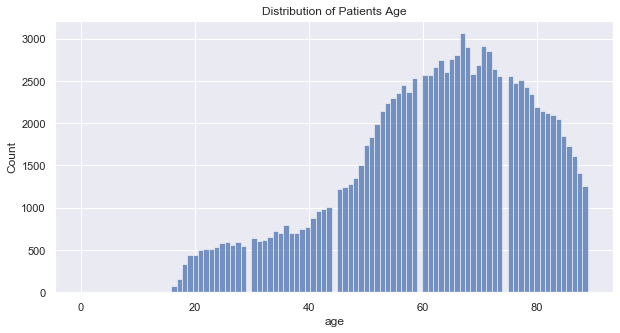

In [20]:
sns.set()
plt.figure(figsize=(10,5))

sns.histplot(df.age)
plt.title('Distribution of Patients Age')

print('Average Patient Age:', round(df.age.mean(),0))
print(' Median Patient Age:', round(df.age.median(),0))
print('   Mode Patient Age:', round(df.age.mode(),0))

In [21]:
# setting avariable as rounded average age
avg_age = round(df.age.mean(),0)

# filling null values with the average age
df.age = df.age.fillna(avg_age)

In [22]:
# age is in years, and all values end in 0 - will be converted to integers
df.age = df.age.astype({'age':'int'})

Text(0.5, 1.0, 'Distribution of Patients Age')

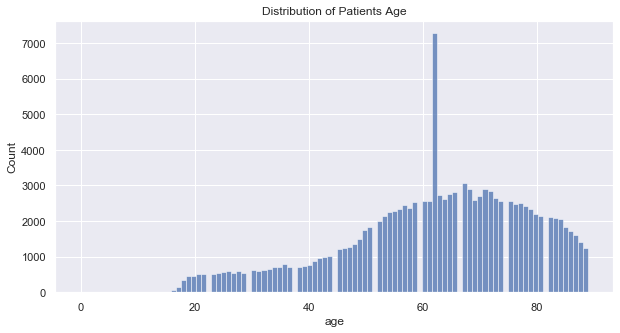

In [23]:
sns.set()
plt.figure(figsize=(10,5))

sns.histplot(df.age)
plt.title('Distribution of Patients Age')

## Note: There is now a huge spike in age where the nulls were filled by the average.
- will decide a different way to handle these nulls
- while less than 5k compared to the total rows of >100k did not seem significant at first, visualizing the effect showed otherwise

## Body Mass Index
- less than 4k nulls
- will probably have the same effect as with age

In [24]:
df.bmi.isnull().sum()

3805

Average Patient BMI: 29.0
 Median Patient BMI: 28.0

    Min Patient BMI: 15.0
    Max Patient BMI: 68.0


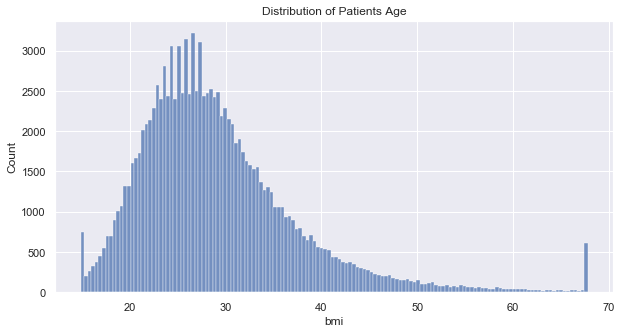

In [25]:
sns.set()
plt.figure(figsize=(10,5))

sns.histplot(df.bmi)
plt.title('Distribution of Patients Age')

print('Average Patient BMI:', round(df.bmi.mean(),0))
print(' Median Patient BMI:', round(df.bmi.median(),0))
print('\n    Min Patient BMI:', round(df.bmi.min(),0))
print('    Max Patient BMI:', round(df.bmi.max(),0))

Note: Peak of BMI's at the minimum and maximum values

## Gender - String to Boolean

In [26]:
# 66 patients have null values for gender
# with such an insiginficant amount, will leave them for now
df.gender.isnull().sum()

28

In [27]:
df['is_female'] = df.gender.replace({'M':0, 'F':1})

In [28]:
df.isnull().sum()

encounter_id                      0
hospital_id                       0
age                               0
bmi                            3805
elective_surgery                  0
                               ... 
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
diabetes_mellitus                 0
is_female                        28
Length: 107, dtype: int64

### Apache 2 Diagnosis - Removing .0 from Integers

In [29]:
df.apache_2_diagnosis.value_counts()

113.0    15956
301.0     8881
302.0     8078
308.0     5708
112.0     5698
124.0     5445
117.0     4781
303.0     4749
122.0     4629
304.0     4449
110.0     4193
203.0     3810
106.0     3345
121.0     3169
114.0     3167
202.0     3096
305.0     3014
123.0     2885
307.0     2537
119.0     2514
102.0     2497
118.0     2212
120.0     1862
214.0     1631
108.0     1604
109.0     1308
105.0     1301
218.0     1035
213.0     1032
207.0      945
306.0      807
217.0      753
219.0      646
209.0      615
101.0      561
104.0      551
103.0      463
115.0      380
107.0      274
116.0      254
215.0      213
208.0      205
212.0      136
216.0       66
Name: apache_2_diagnosis, dtype: int64

In [30]:
# rows that have a null value for spache 2 diagnosis
df.apache_2_diagnosis.isnull().sum()

1275

In [31]:
# can not convert data types with null values in the column, will fill nulls with the average value
# setting variable as the average value
apache_2_diagnosis_mean = df.apache_2_diagnosis.mean()

# filling the 1,685 null values with the average
df.apache_2_diagnosis = df.apache_2_diagnosis.fillna(apache_2_diagnosis_mean)

# now, can convert the data types to integers without trailing decimals
df.apache_2_diagnosis = df.apache_2_diagnosis.astype('int')

In [32]:
# can see no more decimal values
df.apache_2_diagnosis

1         113
2         108
4         203
6         301
7         108
         ... 
130152    305
130154    105
130155    114
130156    124
130157    105
Name: apache_2_diagnosis, Length: 122730, dtype: int64

## Creating Dummy Variables
### ICU Stay Type
- this feature has three different categories
    - admit - replace with 1
    - transfer - replace with 2
    - readmit - replace with 3

In [33]:
# the three categories in icu stay type
df.icu_stay_type.value_counts()

admit       117546
transfer      4625
readmit        559
Name: icu_stay_type, dtype: int64

In [34]:
df.icu_stay_type = df.icu_stay_type.replace({'admit':1, 'transfer':2, 'readmit':3})

In [35]:
# the three categories after replacing with 1,2,3
df.icu_stay_type.value_counts()

1    117546
2      4625
3       559
Name: icu_stay_type, dtype: int64

### ICU Type
Categories in this feature are:
- Med-Surg ICU, 1
- CCU-CTICU, 2
- MICU, 3
- Neuro ICU, 4
- Cardiac ICU, 5
- SICU, 6
- CSICU, 7
- CTICU, 8  
which will be replaced with the corresponding integer

In [36]:
df.icu_type.value_counts()

Med-Surg ICU    67043
CCU-CTICU       10696
MICU            10483
Neuro ICU        9680
SICU             7977
Cardiac ICU      7750
CSICU            4848
CTICU            4253
Name: icu_type, dtype: int64

In [37]:
df.icu_type.replace({'Med-Surg ICU':1, 'CCU-CTICU':2, 'MICU':3, 
                     'Neuro ICU':4, 'Cardiac ICU':5, 'SICU':6, 
                     'CSICU':7, 'CTICU':8}).value_counts()

# sanity checked code with value counts, this line will go in the wrangle.py
''' 
df.icu_type = df.icu_type.replace({'Med-Surg ICU':1, 'CCU-CTICU':2, 'MICU':3,
                                    'Neuro ICU':4, 'Cardiac ICU':5, 'SICU':6, 
                                    'CSICU':7, 'CTICU':8})
'''

" \ndf.icu_type = df.icu_type.replace({'Med-Surg ICU':1, 'CCU-CTICU':2, 'MICU':3,\n                                    'Neuro ICU':4, 'Cardiac ICU':5, 'SICU':6, \n                                    'CSICU':7, 'CTICU':8})\n"

In [38]:
df.weight.value_counts()

68.00     1330
81.60     1171
63.50     1090
90.70     1060
77.10      983
          ... 
83.63        1
57.23        1
138.21       1
81.49        1
60.19        1
Name: weight, Length: 3550, dtype: int64

### Hospital Admit Source
- this feature has 26 percent nulls
- will create dummy variables from the top three categories in this feature
- is_ER_admit, is_OR_admit, and is_Floor_admit
- than remove the original column since higher than 25 percent nulls

In [39]:
df.hospital_admit_source.value_counts()

Emergency Department    47832
Operating Room          13199
Floor                   10733
Direct Admit             7864
Recovery Room            4226
Other Hospital           2333
Acute Care/Floor         1979
Step-Down Unit (SDU)     1529
PACU                      980
Other ICU                 258
Chest Pain Center         237
ICU to SDU                 61
ICU                        36
Observation                10
Other                       7
Name: hospital_admit_source, dtype: int64

In [40]:
df['is_ER_admit'] = df.hospital_admit_source == 'Emergency Department'

In [41]:
df['is_ER_admit'].value_counts()

False    74898
True     47832
Name: is_ER_admit, dtype: int64

In [42]:
df['is_OR_admit'] = df.hospital_admit_source == 'Operating Room'

In [43]:
df['is_OR_admit'].value_counts()

False    109531
True      13199
Name: is_OR_admit, dtype: int64

In [44]:
df['is_Floor_admit'] = df.hospital_admit_source == 'Floor'

In [45]:
df['is_Floor_admit'].value_counts()

False    111997
True      10733
Name: is_Floor_admit, dtype: int64

Original column will be dropped with threshold function later

## Removing Unecessary Columns
### Readmission Status 
- this column is all 0 with no nulls
- no patient has been identified has a readmission

In [46]:
df.readmission_status.value_counts()

0    122730
Name: readmission_status, dtype: int64

In [47]:
df.readmission_status.isnull().sum()

0

In [48]:
df = df.drop('readmission_status', axis=1)

## What should be removed?
- I will set a threshold of nulls percentage, and remove any columns or rows more than this threshold
- starting at 50% nulls, will determine later if a lower or higher threshold is needed

In [49]:
# Removing Nulls from Columns
# sets thresh hold to 75 percent nulls, if more than %25 nulls it will be removed
threshold = df.shape[0] * .75

# remove columns with specified threshold
df_prepped = df.dropna(axis=1, thresh=threshold)

In [50]:
print('   The df now has', df_prepped.shape[1], 'rows.')

   The df now has 108 rows.


In [51]:
# Removing Nulls from Rows
# sets thresh hold to 50 percent nulls, if more than %50 nulls it will be removed
thresh_hold = df.shape[1] * .50

# remove rows with specified threshold
df_prepped = df_prepped.dropna(axis=0,thresh=thresh_hold)

In [52]:
print('   The df now has', df_prepped.shape[1], 'rows with', df_prepped.shape[0], 'observations. \nIt originally had 180 columns and 130157 observations before removing nulls above 25% in the columns and above 50% rows.')

   The df now has 108 rows with 122730 observations. 
It originally had 180 columns and 130157 observations before removing nulls above 25% in the columns and above 50% rows.
